### K-Means is an unsupervised, centroid-based clustering algorithm that follows a simple procedure of classifying a given dataset into a pre-determined number of clusters, denoted as “k”.

K-means is one of the oldest and most approachable.

In the K-Means, we should determine a meaningul K number (number of cluster) that we will be created. The number of K can be determine based on its business case, or we can use elbow method to make a consideration. Below is the function for building the elbow method.

It randomly pick K centroids and use expectation-maximization 
approach --> exceptions assign each data to nearest centrold, maxmization--> compute the means of all points for each clusts and sets the new centrold --> repeat and compute the Sum of Squred Error (SSE) by Euclidean distances to it's closest centroid. the objective of k-means is trying to minimize this value.

After choosing a number of clusters and the initial centroids, the expectation-maximization step is repeated until the centroid positions reach convergence and are unchanged. it is nondeterministic.

strength:
work wrll with spherical share clusters
scalable 

weakness:
not suitable for clusters with complex shapes and different sized !!
break down when used with clusters of different densities

### Types of clustering 
Partitional clustering: divide into nonoverlapping groups, nondeterministic, 
Hierarchical CLustering: tree-based hierarchy, clusters are assigned by cutting the dendrogram at specified depth, deterministic
Density-based clustering: doesn't require number of cusers, there is a distance-based parameters needed as threshold, DBSCAN 


In [12]:
import matplotlib.pyplot as plt


from sklearn.datasets import make_blobs #generate synthetic clusters
from kneed import KneeLocator

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]


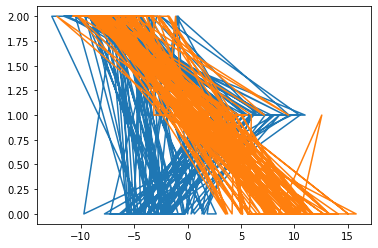

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [16]:
#Question: Given our movies data set, what are the 5 most similar movies to a movie query?

#prepare the data 
features, true_labels = make_blobs(n_samples=200,
                                    centers=3,
                                    cluster_std=2.75,
                                    random_state=42)
#view the data
print(features[:5])

print(true_labels[:5])

plt.plot(features,true_labels)
plt.show()

#feature scaling to preprocess the data
scaler = StandardScaler()
scaled_features=scaler.fit_transform(features)

scaled_features[:5]

In [25]:
#define and fit the model
Kmeans=KMeans(init="random", 
              n_clusters=3, #k number of clusters
              n_init=10,  #sets of number of initializations, will return the results with the lowest SSE
              max_iter=300,   #max iterations of initializations
              random_state=42)

Kmeans.fit(scaled_features)

#view the results
print('The lowest SSE value: {}'.format(Kmeans.inertia_))

print('The final centroid location {}'.format(Kmeans.cluster_centers_))

#final cluster assignments as a one-dimensional numpy array 
Kmeans.labels_[:5]



The lowest SSE value: 74.57960106819854
The final centroid location [[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]


array([2, 0, 1, 1, 1])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[399.9999999999999, 173.23074893877765, 74.57960106819854, 61.30474344497749, 52.27538725902107, 43.96311767832819, 38.52881875287542, 34.82637407026124, 31.13865746439756, 27.89657236940263]


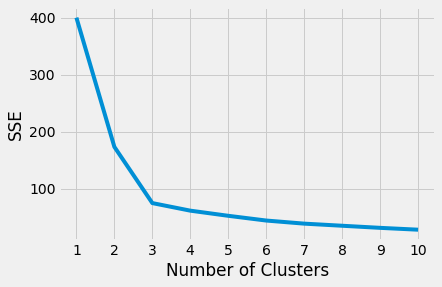

3

In [44]:
#choose the appropriate number of clusters 
# 1. Elbow method 
# To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

kmeans_kwargs = {"init": "random",
                  "n_init": 10,
                  "max_iter": 300,
                  "random_state": 42
                 }

    
sse=[]

for k in range(1,11):
    kmeans= KMeans(n_clusters = k, **kmeans_kwargs) #use ** to iterate through a dictinary
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

print(sse)

# notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.
# There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. 

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#alternatively use python package kneed to identify the elbow point 

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow
    

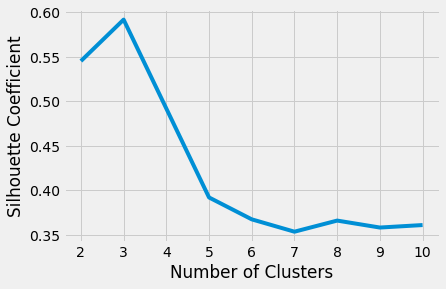

In [54]:
# 2.silhouette coefficient :  measure of cluster cohesion and separation

# Silhouette coefficient values range between -1 and 1. 
# Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


# How close the data point is to other points in the cluster, far better
# How far away the data point is from points in other clusters, close better, needs a min of 2 iteration

silhouette_coefficients = []

for k in range (2, 11): 
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range (2, 11),silhouette_coefficients)
plt.xticks(range(2, 11))

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Altermately thould be guided by a combination of domain knowledge and clustering evaluation metrics.



In [55]:
# When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow 
# method and silhouette coefficient rarely match human intuition.
# This scenario highlights why advanced clustering evaluation techniques are necessary.


from sklearn.cluster import DBSCAN #density based model
from sklearn.datasets import make_moons #generate synthetic data in the shape of crescents
from sklearn.metrics import adjusted_rand_score

#create data 
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

#prepropress data 
scaled_features = scaler.fit_transform(features)

In [58]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)


print('kmeans_silhouette: {}'.format(kmeans_silhouette)) #bigger value suggests better clusters, which is misleading
print('dbscan_silhouette: {}'.format(dbscan_silhouette))



kmeans_silhouette: 0.5
dbscan_silhouette: 0.38


In [63]:
scaled_features[:5]

array([[-0.48023085, -0.28032707],
       [ 0.62771081, -0.19665978],
       [-1.39787132,  0.85683564],
       [-0.50684454,  1.36434089],
       [-1.72904034,  0.17085164]])

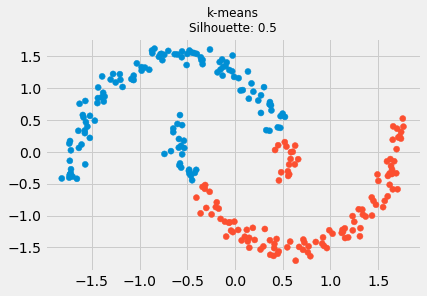

In [72]:
# define color dictionary
fte_colors = {0: "#008fd5", 1: "#fc4f30"}

#assign color for each label
km_colors = [fte_colors[label] for label in kmeans.labels_]

plt.scatter(scaled_features[:,0], scaled_feaatures[:, 1], c=km_colors)
plt.title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})
plt.show()

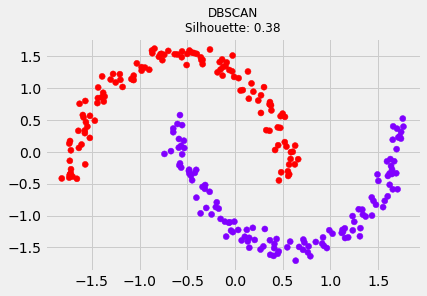

In [80]:
#assign color for each label
fte_colors = {0: "#008fd5", 1: "#fc4f30"}

db_colors = [fte_colors[label] for label in dbscan.labels_]

plt.scatter(scaled_features[:,0], scaled_features[:, 1], c=db_colors)

# or use c=y, cmap='rainbow'
#plt.scatter(scaled_features[:,0], scaled_features[:, 1], c=dbscan.labels_,cmap='rainbow') 


plt.title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

In [78]:
# Another adjusted rand index (ARI): 
# ARI true cluster assignments to measure the similarity between true and predicted labels
# it ranges between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print('kmeans: ', round(ari_kmeans, 2))

print('dbscan: ', round(ari_dbscan, 2))


kmeans:  0.47
dbscan:  1.0
